### About the Dataset 
This dataset is from Bureau of Transportation Statistics. It tracks the on time performance of domestic flights operated by large air carriers. The dataset is for each year and can be downloaded directly from their website. The description is posted on their website in detail.

For this data analysis, we will be using data for the years of 2007 and 2008.

### Wrangling of Dataset 

In [1]:
#importing all libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_2008 = pd.read_csv('2008.csv')
df_2007 = pd.read_csv('2007.csv')

In [3]:
df_data=df_2007.append([df_2008])

In [4]:
print(df_data.shape)

(9842432, 29)


In [5]:
# df_data.to_csv('final.csv') 

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.shape

(9842432, 30)

In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,...,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,...,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,...,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,4,2007,1,1,1,831.0,830,957.0,1000,WN,...,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.drop(["Unnamed: 0"], axis='columns', inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df.dtypes)
print(df.describe)

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
<bound method NDFrame.describe of          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2007      1           1  

### What's the structure of the dataset ?
The dataset has 29 columns and 9842432 rows.

### What is/are the main feature(s) of interest in the dataset?
The main features are; the factors affecting the delays and cncellations of the flights. These factors will help us to determine the time performace and characteristics of flights of different destinations. 

### What features in the dataset will help to support the investigation into the feature(s) of interest?
The main features of interest of the dataset are the factors which are involved in delaying arrival and departure (in time, minutes), cancellation codes and reasons. Also an effort will be undergone for spotting any correlation between parameters.

## Univariate Exploration

In [7]:
df['CancellationCode'].unique().tolist()

[nan, 'A', 'B', 'C', 'D']

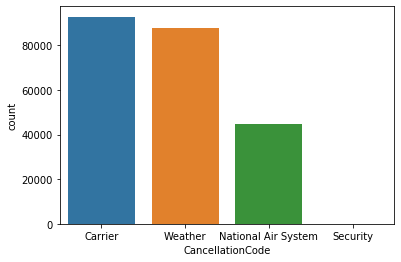

In [8]:
#Define plot (reference: http://alanpryorjr.com/visualizations/seaborn/countplot/countplot/)
plot = sb.countplot(x="CancellationCode", data=df)
plot.set_xticklabels(['Carrier','Weather','National Air System','Security']);

The avobe graph shows that "Carrier" and "Weather" are the staple reason for the flight cancellation.

### Which Carrier had the most cancellations? 

In [9]:
# creating a DataFrame with carrier and cancellation code 
carrier = df.UniqueCarrier.tolist()
cancellation_code = df.CancellationCode.tolist()

most_cancellation = pd.DataFrame({'cancellation_code':cancellation_code, 'carrier': carrier})
most_cancellation = most_cancellation.dropna()
#most_cancellation

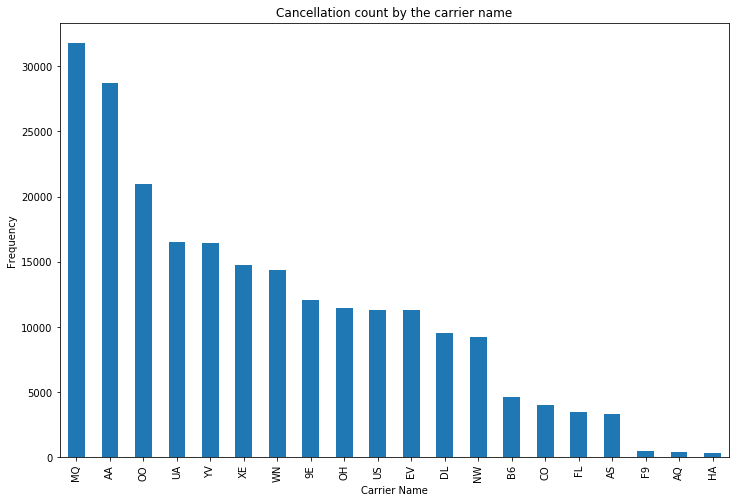

In [10]:
#Define Plot
plt.figure(figsize=(12,8))
fig= most_cancellation['carrier'].value_counts().plot(kind ='bar')
fig.set_title('Cancellation count by the carrier name')
fig.set_xlabel('Carrier Name')
fig.set_ylabel('Frequency');

The above bar plot shows that the MQ, AA and OO are the top three carriers with highest cancellation whereas HA is the carrier with lowest cancellations. The cancellation has been considered for the four type of cancellation code A, B,C and D. 

### Which carriers had the highest delays ? (arrival and departure)

In [11]:
#To explore delays, we created new dataframes that excluded NaN (missing) values in delays to plot histogram.
arrival_delay = df[df.ArrDelay.notnull()]
departure_delay = df[df.DepDelay.notnull()]

In [12]:
# grouping the arrival and departure by Carrier
arrival_delay_carrier = arrival_delay.groupby('UniqueCarrier').ArrDelay.sum().sort_values(ascending=False)
departure_delay_carrier = departure_delay.groupby('UniqueCarrier').DepDelay.sum().sort_values(ascending=False)
delay=pd.merge(arrival_delay_carrier,departure_delay_carrier,on='UniqueCarrier')
# delay.head()

In [13]:
# delay.ArrDelay.tolist()
# delay.index.tolist()

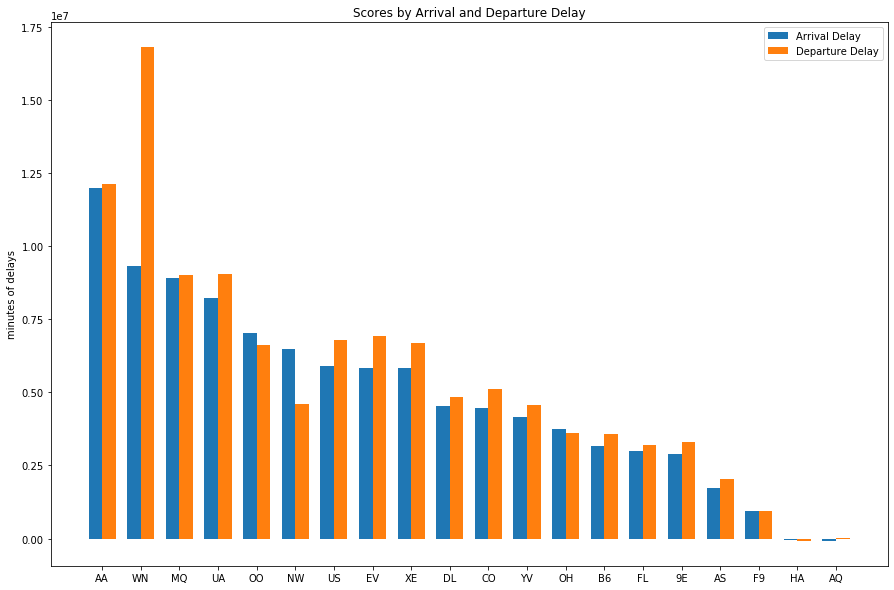

In [14]:
#Define Plot
x = np.arange(len(delay.index))  # the carrier locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, delay.ArrDelay, width, label='Arrival Delay')
rects2 = ax.bar(x + width/2, delay.DepDelay, width, label='Departure Delay')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('minutes of delays')
ax.set_title('Scores by Arrival and Departure Delay')
ax.set_xticks(x)
ax.set_xticklabels(delay.index)
ax.legend()
plt.show();

From the plot it can be seen that (AA)American Airlines has the highest arrival delays. On the contrary 'WN' has the highest Departure Delay.

### In which month of the year the most cancellations occurred?

In [15]:
cancellation_code = df.CancellationCode.tolist()
month = df.Month.tolist()

cancellation_month = pd.DataFrame({'cancellation_code':cancellation_code, 'month': month})
cancellation_month = cancellation_month.dropna()
# cancellation_month

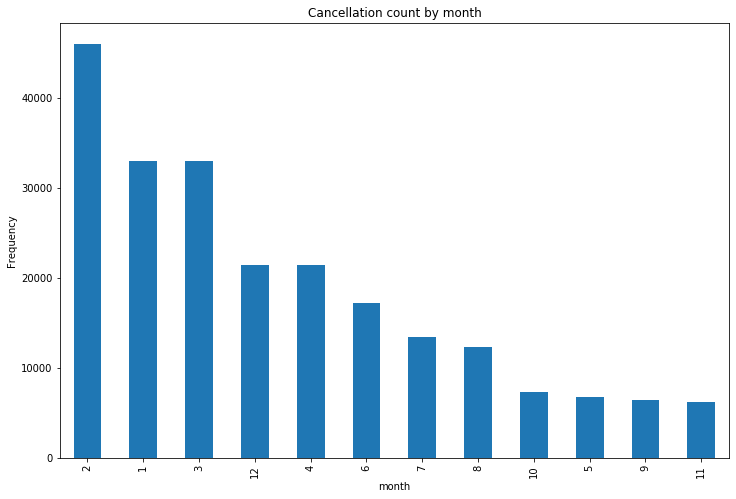

In [16]:
#Define Plot
plt.figure(figsize=(12,8))
fig= cancellation_month['month'].value_counts().plot(kind ='bar')
fig.set_title('Cancellation count by month')
fig.set_xlabel('month')
fig.set_ylabel('Frequency');

It can be seen that the first three months see the major cancellations whereas 2nd month has the most. In January and March the cancellation were almost same. 

### What does the distribution of arrival delays and departure delays look like?

In [17]:
# recalling previously used dataFrame 
arrival_delay = df[df.ArrDelay.notnull()]
adelay = arrival_delay.ArrDelay
adelay.head()

0     1.0
1     8.0
2    34.0
3    26.0
4    -3.0
Name: ArrDelay, dtype: float64

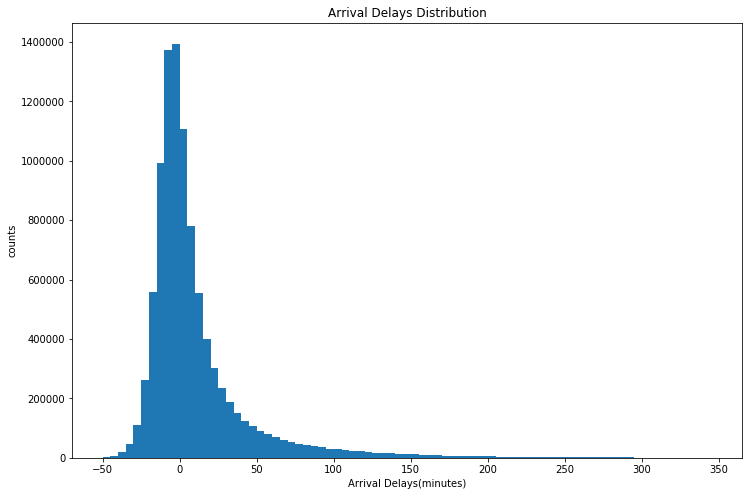

In [18]:
#Define plot
plt.figure(figsize=(12,8))
plt.title('Arrival Delays Distribution')
plt.xlabel('Arrival Delays(minutes)')
plt.ylabel('counts')
plt.hist(adelay,bins=np.arange(-50,350,5));

From the histogram we can see that most of the delays are concentrated between 0 and 50 minutes. The distribution is skewed to the right.

In [19]:
#Filtering only data with departure_delay information, excluding NaN
depart_delay=df[df.DepDelay.notnull()]
ddelay = depart_delay.DepDelay
ddelay.head()

0     7.0
1    13.0
2    36.0
3    30.0
4     1.0
Name: DepDelay, dtype: float64

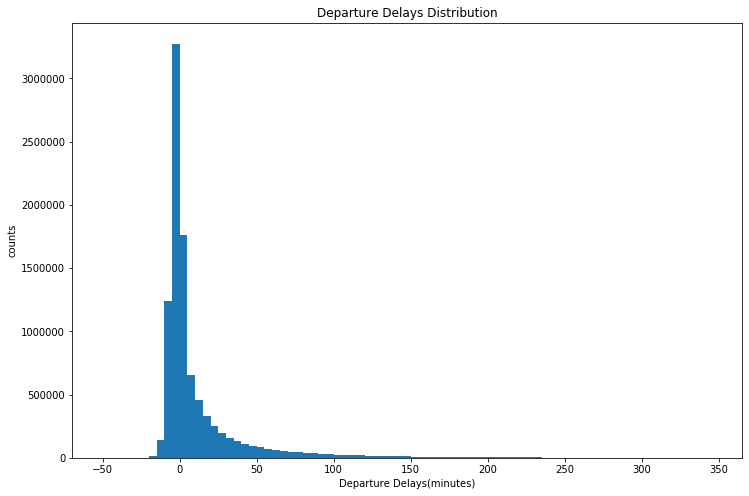

In [20]:
#Define plot
plt.figure(figsize=(12,8))
plt.title('Departure Delays Distribution')
plt.xlabel('Departure Delays(minutes)')
plt.ylabel('counts')
plt.hist(ddelay,bins=np.arange(-50,350,5));

The histogram above shows the distribution of departure delays. From the graph, it can be observed that most of the delays are between 0 and 50. The graph is skewed to the right

## Bivariate Exploration 

## What is the relationship between arrival and departure delays? 

<Figure size 1008x576 with 0 Axes>

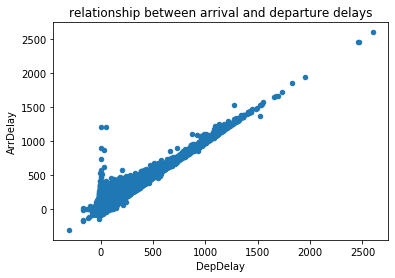

In [21]:
#Define Plot
plt.figure(figsize=(14,8))
df.plot.scatter(x='DepDelay', y='ArrDelay')
plt.title('relationship between arrival and departure delays')
plt.show();

There is a linear realationship between departure and arrival delays. With the increase of Arrival delay, departure delay is also increasing.

## Is there any relationship between departure delay and taxi out time?

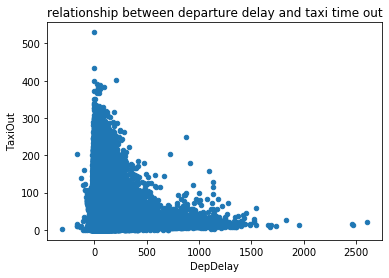

In [22]:
#Define plot
df.plot.scatter(x='DepDelay', y='TaxiOut')
plt.title('relationship between departure delay and taxi time out')
plt.show();


There is no linear relationship between departure delay and taxi out time. The data at the left on the graph shows that, there is no effect on departure delay as the delay for Taxi Out increased. 

### What is the Fight performance of the carriers in terms of arrival delays?

In [23]:
#Getting a dataframe with number of flights that were delayed and not cancelled by each carrier
df_depart_delay=df[df.DepDelay.notnull()]
arrival_delayed=df_depart_delay.query('Cancelled==0 & ArrDelay>0').groupby('UniqueCarrier').size().reset_index(name='delayed_flights')

arrival_delayed.head()

,UniqueCarrier,delayed_flights
0,9E,144283
1,AA,423359
2,AQ,14693
3,AS,97363
4,B6,116799


In [24]:
#Getting a dataframe with number of total flights that took off (not cancelled)
uncancelled_flights=df.query('Cancelled==0').groupby('UniqueCarrier').size().reset_index(name='total_flights')
uncancelled_flights.head()

,UniqueCarrier,total_flights
0,9E,335174
1,AA,809668
2,AQ,53730
3,AS,206703
4,B6,254316


In [25]:
#Merging both dataframes on unique_carrier_code
df_merged=pd.merge(arrival_delayed,uncancelled_flights,on='UniqueCarrier')
df_merged = df_merged.sort_values(by =['delayed_flights', 'total_flights'], ascending = False)
df_merged.head()

,UniqueCarrier,delayed_flights,total_flights
17,WN,671617,1553464
1,AA,423359,809668
14,OO,361584,772107
11,MQ,328208,676602
16,US,317405,627654


In [26]:
# changing the index as carrier 
carrier = df_merged.UniqueCarrier.tolist()
delay_flight = df_merged.delayed_flights.tolist()
total_flight = df_merged.total_flights.tolist()

df1 = pd.DataFrame({'delay_flight':delay_flight, 'total_flight':total_flight}, index = carrier)
df1.head()

,delay_flight,total_flight
WN,671617,1553464
AA,423359,809668
OO,361584,772107
MQ,328208,676602
US,317405,627654


In [27]:
df1['ratio']=df1.delay_flight/df1.total_flight
df1

,delay_flight,total_flight,ratio
WN,671617,1553464,0.432335
AA,423359,809668,0.522880
OO,361584,772107,0.468308
MQ,328208,676602,0.485083
US,317405,627654,0.505701
UA,309194,627493,0.492745
NW,299206,528104,0.566566
DL,286888,617726,0.464426
XE,241805,558805,0.432718
CO,198755,421818,0.471187


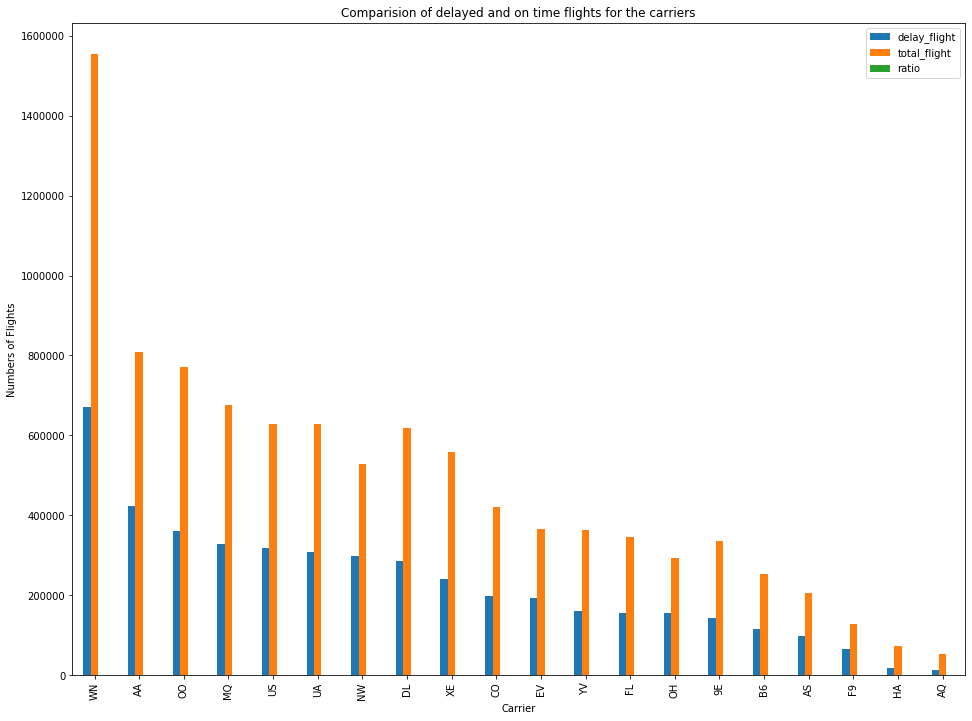

In [28]:
# Define plot 
ax = df1.plot.bar(figsize= [16,12], rot=90)
plt.xlabel('Carrier')
plt.ylabel('Numbers of Flights')
plt.title('Comparision of delayed and on time flights for the carriers')

plt.show()

It is visible that the carrier 'WN' has conducted more flights and they have the highest number of delays as well, next plot the percentage will be showen.

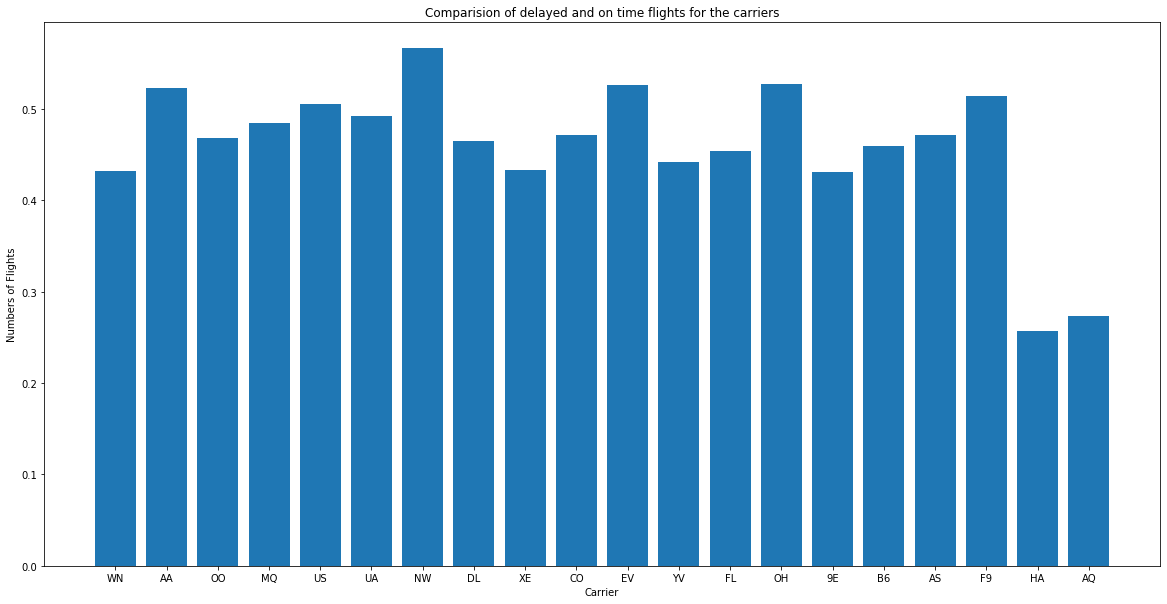

In [29]:
# Define plot 
plt.figure(figsize=(20,10))
plt.bar(list(df1.index), df1.ratio)
plt.xlabel('Carrier')
plt.ylabel('Numbers of Flights')
plt.title('Comparision of delayed and on time flights for the carriers')

plt.show()

So, it is now clear that the highest percentage of delays has been occured in the carrier named 'NW'. 

### Is there any relationship between the flight delays and destination ?

In [30]:
# getting information for destination based flights that has delayed but not cancelled 
df_depart_delay=df[df.DepDelay.notnull()]
arrival_delayed_dest=df_depart_delay.query('Cancelled==0 & ArrDelay>0').groupby('Dest').size().reset_index(name='delayed_flights')

arrival_delayed_dest.head()

,Dest,delayed_flights
0,ABE,3347
1,ABI,1743
2,ABQ,24599
3,ABY,901
4,ACK,164


In [31]:
#Getting a dataframe with number of total flights that took off (not cancelled) based on destination 
uncancelled_flights_dest=df.query('Cancelled==0').groupby('Dest').size().reset_index(name='total_flights')
uncancelled_flights_dest.head()

,Dest,total_flights
0,ABE,7054
1,ABI,3601
2,ABQ,54298
3,ABY,1693
4,ACK,282


In [32]:
#Merging both dataframes on Destination 
df_merged_dest=pd.merge(arrival_delayed_dest,uncancelled_flights_dest,on='Dest')
df_merged_dest.head()

,Dest,delayed_flights,total_flights
0,ABE,3347,7054
1,ABI,1743,3601
2,ABQ,24599,54298
3,ABY,901,1693
4,ACK,164,282


In [33]:
df_merged_dest_sort = df_merged_dest.sort_values(by =['delayed_flights', 'total_flights'], ascending = False)
top_20_destination = df_merged_dest_sort.head(20)

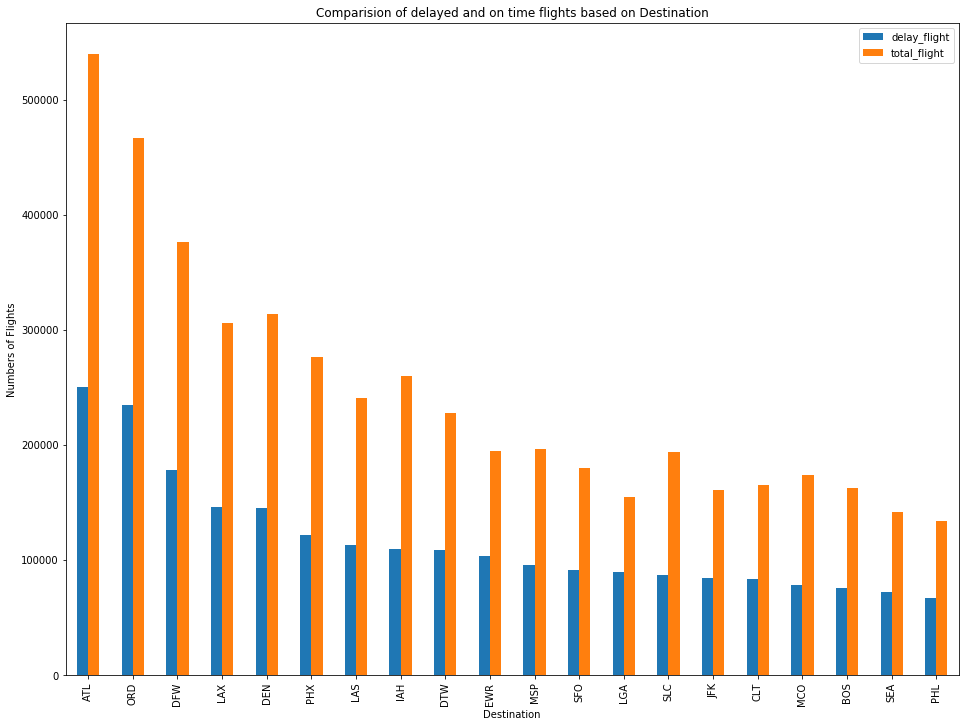

In [34]:
# changing the index as Destination 
dest = top_20_destination.Dest.tolist()
delay_flight = top_20_destination.delayed_flights.tolist()
total_flight = top_20_destination.total_flights.tolist()

df2 = pd.DataFrame({'delay_flight':delay_flight, 'total_flight':total_flight}, index = dest)
df2.head()
# Define Plot 
ax = df2.plot.bar(figsize= [16,12], rot=90)
plt.xlabel('Destination')
plt.ylabel('Numbers of Flights')
plt.title('Comparision of delayed and on time flights based on Destination')

plt.show()

The figure above gives an overview of top 20 Desitinations where the flights has conducted on Time and delayed. The highest number of flight has been conducted in 'ATL'(Atlanta, GA: Hartsfield-Jackson Atlanta International) and the delayed number of flights is also higher in 'ATL'. It's pretty interesting all the destinations has a delayed number flights which is almost the half the number of total flights conducted for respective destinations.

## Multivariate Exploration

### Is there any relations between the AirTime and the flight delays? Are long distance flights prone delay more than that of small distance Flights while conducting Flights ? [long/small distance flights(in time)] 

In [35]:
#creating arrays for the necessary columns 
data = {'AirTime':df.AirTime,'CD':df.CarrierDelay,'WD':df.WeatherDelay, 'NASD':df.NASDelay, 'SD':df.SecurityDelay, 'LAD':df.LateAircraftDelay}

In [36]:
# creating dataframe with all the delays and AirTime 
df3=pd.DataFrame(data)

In [37]:
#droping null values 
df3 = df3.dropna()

In [38]:
#dropping flights having less airtime than 30, for generating good graph
df3 = df3.drop(df3[df3.AirTime < 30.0].index)

In [39]:
#sorting 
df3 = df3.sort_values(by=['AirTime'])

In [40]:
df3['MeanDelay'] = df3.loc[:,'CD':].mean(axis=1)

In [41]:
df3 = df3.astype('float32')
df3

,AirTime,CD,WD,NASD,SD,LAD,MeanDelay
799326,30.0,0.0,0.0,0.0,0.0,0.0,0.000000
2838763,30.0,0.0,0.0,0.0,0.0,0.0,0.000000
2838779,30.0,0.0,0.0,0.0,0.0,0.0,0.000000
2838781,30.0,0.0,0.0,18.0,0.0,0.0,3.600000
2838785,30.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
2828314,966.0,853.0,0.0,0.0,0.0,18.0,174.199997
6608082,1068.0,894.0,0.0,0.0,0.0,0.0,178.800003
2205995,1071.0,620.0,0.0,0.0,0.0,0.0,124.000000
3867296,1248.0,49.0,0.0,1154.0,0.0,0.0,240.600006


In [42]:
# defining a function for polynomial regression (for each delay)
def polyreg(data):
    poly = PolynomialFeatures(degree = 2) 
    X_poly = poly.fit_transform(np.array(df3.AirTime).reshape(-1, 1)) 

    poly.fit(X_poly, np.array(data)) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, np.array(data)) 

    reg = lin2.predict(poly.fit_transform(np.array(df3.AirTime).reshape(-1, 1)))
    scale = (reg*(min(data)-max(data))-max(reg)*min(data)+min(reg)*max(data))/(min(reg)-max(reg))
    return scale

In [43]:
# inserting every delays in the function 
lad= polyreg(df3.LAD)
wd= polyreg(df3.WD)
cd= polyreg(df3.CD)
sd= polyreg(df3.SD)
nasd= polyreg(df3.NASD)
md= polyreg(df3.MeanDelay)

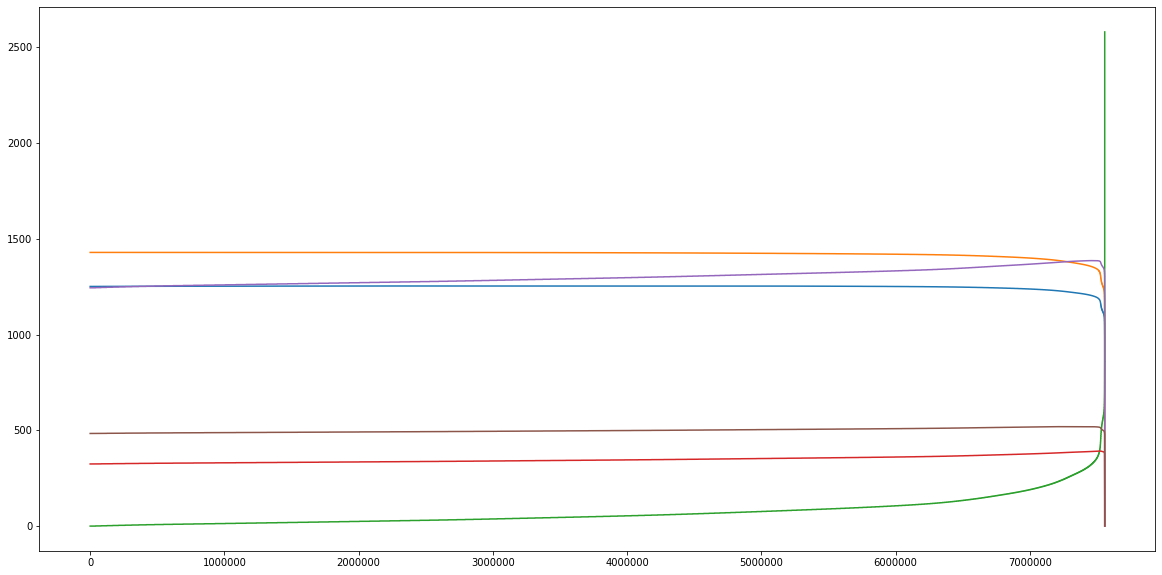

In [44]:
#Define Plot (regression plot for the delays)
plt.figure(figsize=(20,10))
plt.plot(lad)
plt.plot(wd)
plt.plot(cd)
plt.plot(sd)
plt.plot(nasd)
plt.plot(md)
#plt.plot(df3.AirTime*(len(scaled)/max(exp)),exp)

The figure above shows the regression line for each delays with resepect to Air Time. It can be observed that at the end of the dataset there are some outliers for which the regression line has gone up suddenly. It is also observable that the delays are in gerneral acute in those flights where the AirTime is less and delays are decreasing as the AirTime increases. 

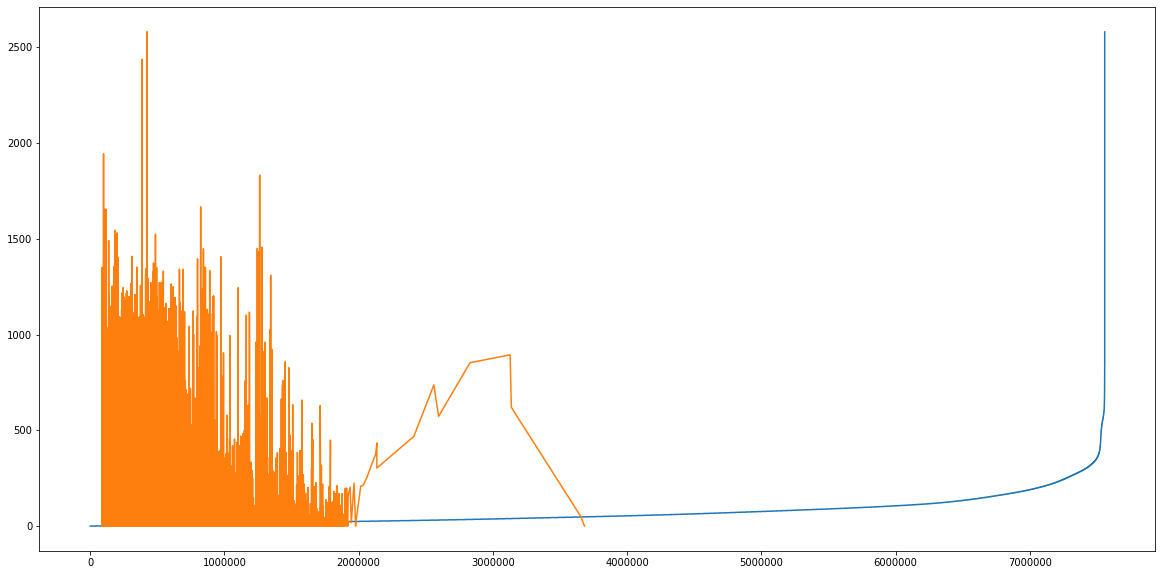

In [45]:
# Define Plot (original Carrier delay vs the regression line for Carrier Delay)
plt.figure(figsize=(20,10))
plt.plot(cd)
plt.plot(df3.AirTime*(len(cd)/max(df3.CD)),df3.CD)

The figure shows the comparision between the regression line for carrier delay and carrier delay with respect to the AirTime. It is seen that delays are more acute in the flights where the AirTime is less. For example, the figure for the carrier delay has been shown, but other delays can be compared with regression line as well. 

Reference 
1. http://alanpryorjr.com/visualizations/seaborn/countplot/countplot/
2. https://etav.github.io/python/count_basic_freq_plot.html
